In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold
from sklearn import metrics
from sklearn import preprocessing 
from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
seeds=pd.read_csv('data_grains.csv')

In [3]:
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama wheat
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Kama wheat
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,Kama wheat
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219,Kama wheat


In [4]:
varities=list(seeds.pop('grain_variety'))

In [5]:
samples=seeds.values

In [6]:
samples

array([[14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.03  , 14.16  ,  0.8796,  5.438 ,  3.201 ,  1.717 ,  5.001 ],
       [13.99  , 13.83  ,  0.9183,  5.119 ,  3.383 ,  5.234 ,  4.781 ],
       [14.11  , 14.26  ,  0.8722,  5.52  ,  3.168 ,  2.688 ,  5.219 ],
       [13.02  , 13.76  ,  0.8641,  5.395 ,  3.026 ,  3.373 ,  4.825 ],
       [15.49  , 14.94  ,  0.8724,  5.757 ,  3.371 ,  3.412 ,  5.228 ],
       [16.2   , 15.27  ,  0.8734,  5.826 ,  3.464 ,  2.823 ,  5.527 ],
       [13.5   , 13.85  ,  0.8852,  5.351 ,  3.158 ,  2.249 ,  5.176 ],
       [15.36  , 14.76  ,  0.8861,  5.701 ,  3.393 ,  1.367 ,  5.132 ],
       [15.78  , 14.91  ,  0.8923,  5.674 ,  3.434 ,  5.593 ,  5.136 ],
       [14.46  , 14.35  ,  0.8818,  5.388 ,  3.377 ,  2.802 ,  5.044 ],
       [11.23  , 12.63  ,  0.884 ,  4.902 ,  2.879 ,  2.269 ,  4.703 ],
       [14.34  , 14.37  ,  0.8726,  5.63  ,  3.19  ,  1.313 ,  5

In [7]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [8]:
mergings=linkage(samples,method='complete')

In [9]:
len(mergings)

41

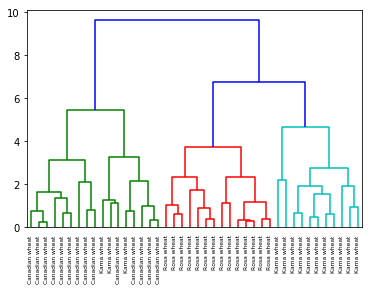

In [10]:
dendrogram(mergings,labels=varities,leaf_rotation=90,leaf_font_size=6)
plt.show()

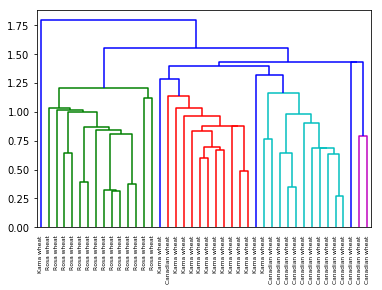

In [11]:
mergings=linkage(samples,method='single')
dendrogram(mergings,labels=varities,leaf_rotation=90,leaf_font_size=6)
plt.show()

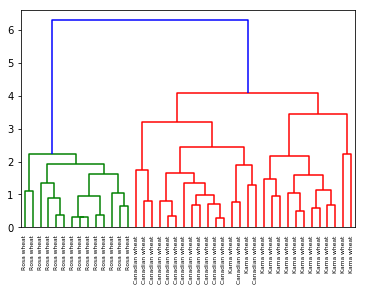

In [12]:
mergings=linkage(samples,method='average')
dendrogram(mergings,labels=varities,leaf_rotation=90,leaf_font_size=6)
plt.show()

## Cutting the dendogram

In [13]:
from scipy.cluster.hierarchy import fcluster

In [14]:
labels=fcluster(mergings,4,criterion='distance')#complete

In [15]:
labels

array([3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [16]:
result=pd.DataFrame({'label':labels,'variety':varities})
result

,label,variety
0,3,Kama wheat
1,3,Kama wheat
2,3,Kama wheat
3,3,Kama wheat
4,3,Kama wheat
5,2,Kama wheat
6,3,Kama wheat
7,3,Kama wheat
8,3,Kama wheat
9,3,Kama wheat


In [17]:
cs=pd.crosstab(result['label'],result['variety'])
cs

variety,Canadian wheat,Kama wheat,Rosa wheat
label,,,
1,0,0,14
2,14,2,0
3,0,12,0


In [18]:
(1-(2/42) )*100

95.23809523809523

# Example  2

In [19]:
df=pd.read_csv('wall_street_data.csv',index_col=0)

In [20]:
df.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [21]:
companies=list(df.index)

In [22]:
movement=df.values

In [23]:
from sklearn.preprocessing import normalize

In [24]:
normalized_movement=normalize(movement)

In [25]:
mergings=linkage(normalized_movement,method='complete')

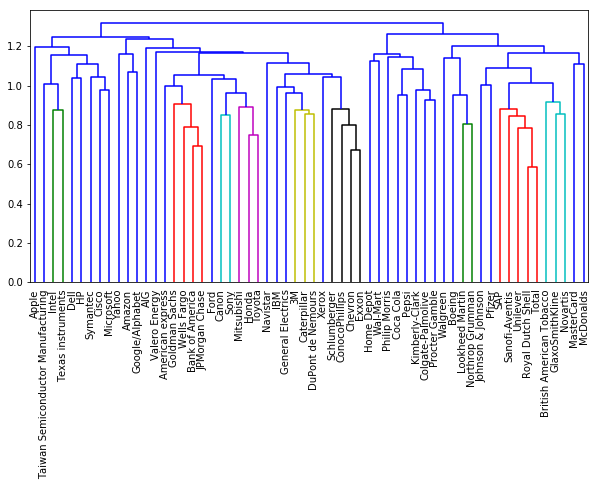

In [26]:
mergings=linkage(normalized_movement,method='complete')
plt.figure(figsize=(10,5))
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=10)
plt.show()

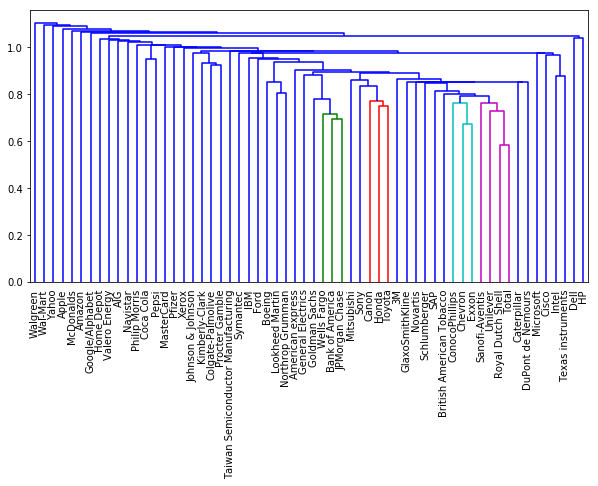

In [27]:
mergings=linkage(normalized_movement,method='single')
plt.figure(figsize=(10,5))
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=10)
plt.show()

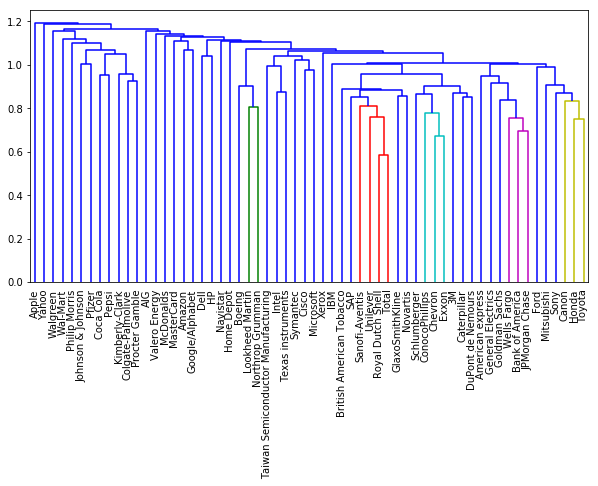

In [28]:
mergings=linkage(normalized_movement,method='average')
plt.figure(figsize=(10,5))
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=10)
plt.show()

## Example 3

In [29]:
score=pd.read_csv('televoting_europe.csv',index_col=0)

In [30]:
country=score.index

In [31]:
score

,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,France,...,Lithuania,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom
From country,,,,,,,,,,,,,,,,,,,,,
Albania,2.0,12.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,4.0,0.0,5.0,7.0,0.0,0.0,3.0,0.0,6.0,0.0
Armenia,NaN,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,7.0,...,0.0,5.0,1.0,12.0,0.0,0.0,2.0,0.0,10.0,0.0
Australia,0.0,NaN,3.0,0.0,12.0,10.0,0.0,0.0,0.0,7.0,...,1.0,6.0,0.0,5.0,0.0,2.0,0.0,0.0,8.0,4.0
Austria,0.0,3.0,NaN,0.0,0.0,5.0,0.0,0.0,0.0,1.0,...,0.0,0.0,12.0,8.0,4.0,0.0,7.0,6.0,10.0,0.0
Azerbaijan,0.0,2.0,0.0,NaN,0.0,8.0,0.0,0.0,0.0,4.0,...,0.0,5.0,3.0,12.0,0.0,0.0,0.0,0.0,10.0,0.0
Belarus,7.0,1.0,0.0,8.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,12.0,0.0,0.0,2.0,0.0,10.0,0.0
Belgium,7.0,4.0,3.0,0.0,NaN,5.0,0.0,0.0,0.0,8.0,...,0.0,0.0,12.0,6.0,0.0,0.0,1.0,10.0,2.0,0.0
Bosnia & Herzegovina,0.0,3.0,5.0,8.0,0.0,2.0,10.0,0.0,0.0,4.0,...,0.0,0.0,0.0,6.0,12.0,0.0,0.0,0.0,7.0,0.0
Bulgaria,8.0,5.0,4.0,1.0,0.0,NaN,0.0,7.0,0.0,0.0,...,0.0,0.0,6.0,12.0,0.0,0.0,3.0,0.0,10.0,0.0


In [32]:
score=score.fillna(12)

In [33]:
points=score.values

In [34]:
normalized_points=normalize(points)

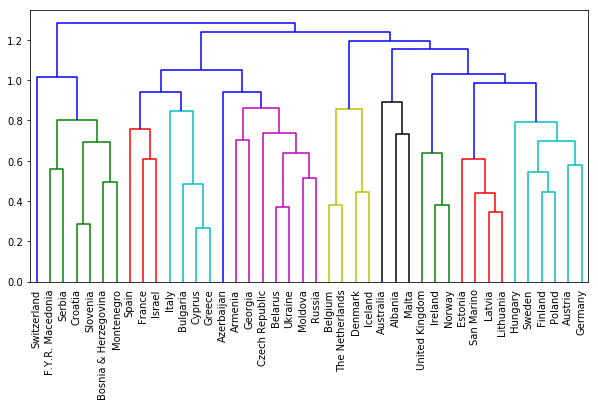

In [35]:
mergings=linkage(normalized_points,method='complete')
plt.figure(figsize=(10,5))
dendrogram(mergings,
           labels=country,
           leaf_rotation=90,
           leaf_font_size=10)
plt.show()

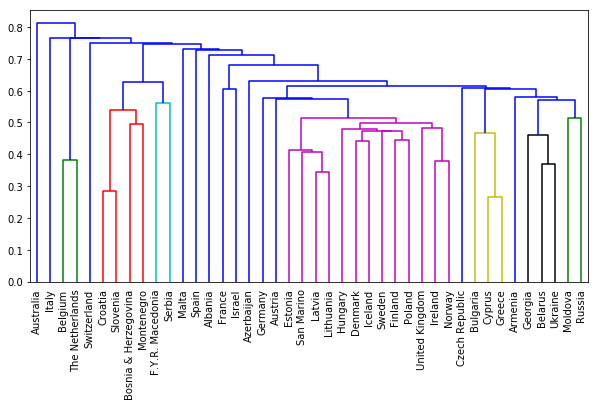

In [36]:
mergings=linkage(normalized_points,method='single')
plt.figure(figsize=(10,5))
dendrogram(mergings,
           labels=country,
           leaf_rotation=90,
           leaf_font_size=10)
plt.show()

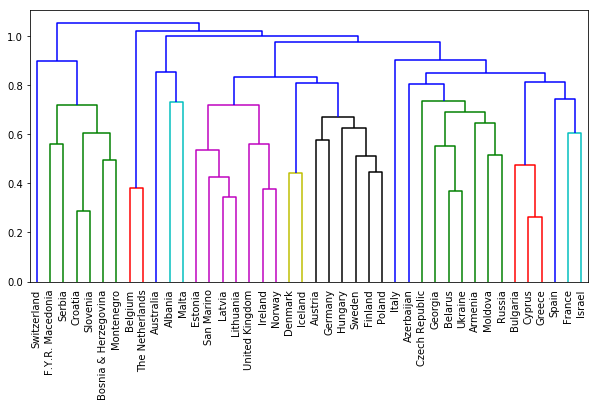

In [37]:
mergings=linkage(normalized_points,method='average')
plt.figure(figsize=(10,5))
dendrogram(mergings,
           labels=country,
           leaf_rotation=90,
           leaf_font_size=10)
plt.show()